<a href="https://colab.research.google.com/github/saugathacker/FA590-assignment1/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/FA590/FA590-assignment1')

In [ ]:
!pwd

/content/drive/MyDrive/FA590/FA590-assignment1


### Saugat K Shrestha
### kagle username: saugatkshrestha



In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [ ]:
df = pd.read_csv("lc_loan.csv")
df = df.drop(columns='id')
df.shape

(933160, 36)

In [ ]:
df.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year,early_default,return
0,5000.0,5000.0,0.1065,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0,0.172631
1,2400.0,2400.0,0.1596,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0,0.252361
2,10000.0,10000.0,0.1349,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,37.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0,0.223189
3,5000.0,5000.0,0.0790,156.46,A,A4,3 years,RENT,36000.0,Source Verified,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0,0.126442
4,3000.0,3000.0,0.1864,109.43,E,E1,9 years,RENT,48000.0,Source Verified,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0,0.313045


Displaying all the column names

In [ ]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'year', 'early_default', 'return'],
      dtype='object')

# Exploratory Data Analysis

### Summary Statistics

Getting summary of features like return, loan_amnt, int_rate and so on.

In [ ]:
summary_stats = df.describe()
summary_stats[['return','loan_amnt','funded_amnt','int_rate','installment','annual_inc','revol_util','fico_range_low','year']]

,return,loan_amnt,funded_amnt,int_rate,installment,annual_inc,revol_util,fico_range_low,year
count,933160.000000,933160.000000,933160.000000,933160.000000,933160.000000,9.331600e+05,933160.000000,933160.000000,933160.000000
mean,0.065197,12559.115559,12555.207923,0.119775,416.318741,7.412200e+04,0.523420,695.139858,2014.668122
std,0.247727,8042.750083,8041.765370,0.039952,268.816718,6.938399e+04,0.240878,31.359123,1.398096
min,-1.000000,500.000000,500.000000,0.053200,14.010000,3.000000e+03,0.000000,660.000000,2008.000000
25%,0.073529,6425.000000,6400.000000,0.089000,215.630000,4.400000e+04,0.344000,670.000000,2014.000000
50%,0.127677,10000.000000,10000.000000,0.115300,339.310000,6.200000e+04,0.526000,690.000000,2015.000000
75%,0.188737,16275.000000,16200.000000,0.143300,549.940000,9.000000e+04,0.708000,710.000000,2016.000000
max,0.581820,40000.000000,40000.000000,0.309900,1584.900000,9.573072e+06,8.923000,845.000000,2016.000000


### Correlation Matrix

Checking the correlation between different key features

(10, 10)


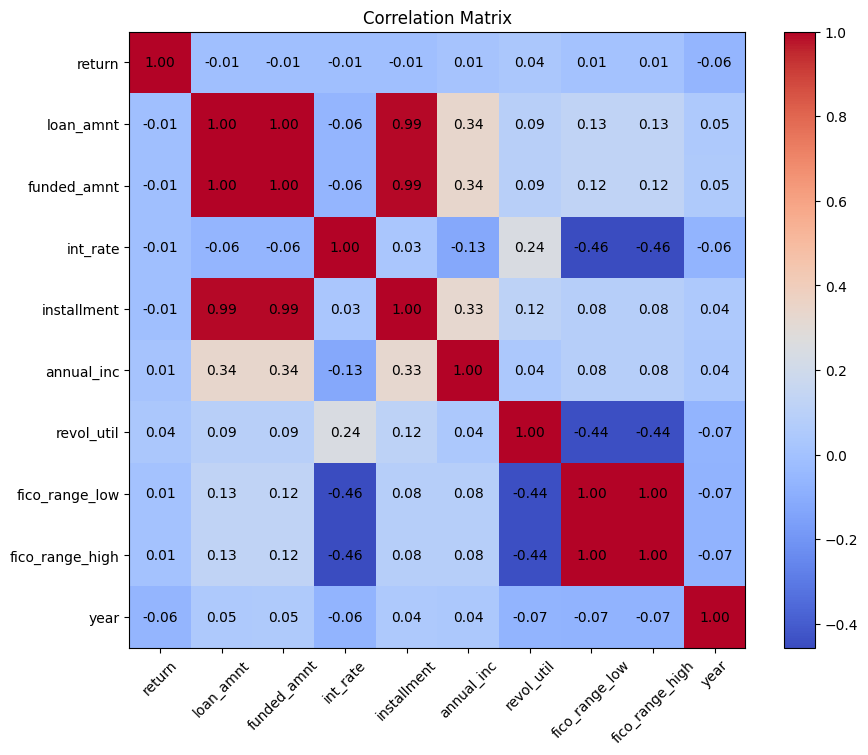

In [ ]:
correlation_matrix = df[['return','loan_amnt','funded_amnt','int_rate','installment','annual_inc','revol_util','fico_range_low','fico_range_high','year']].corr()

print(correlation_matrix.shape)

plt.figure(figsize=(10,8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')

# Annotate the correlation coefficients on the heatmap
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

In [ ]:
# Find pairs of features with high correlation
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Remove self-correlations (diagonal values of 1.00)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]

# Show highly correlated feature pairs
print(high_corr_pairs[high_corr_pairs > 0.9])

fico_range_high  fico_range_low     1.000000
fico_range_low   fico_range_high    1.000000
funded_amnt      loan_amnt          0.999778
loan_amnt        funded_amnt        0.999778
installment      funded_amnt        0.993932
funded_amnt      installment        0.993932
loan_amnt        installment        0.993695
installment      loan_amnt          0.993695
dtype: float64


Dropping funded_amnt, installment, fico_range_high because of high correaltion

In [ ]:
def drop_highly_correlated_features(dataFrame):
    dataFrame.drop(columns=['fico_range_high','installment','loan_amnt'], inplace=True)

In [ ]:
drop_highly_correlated_features(df)

checking the remaining columns of train dataset

In [ ]:
df.columns

Index(['funded_amnt', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'year', 'early_default', 'return'],
      dtype='object')

### Time-series Plot

   year  loan_status
0  2008          168
1  2009          572
2  2010          813
3  2011         1471
4  2012         5841
5  2013        12291
6  2014        22195
7  2015        41869
8  2016        50022


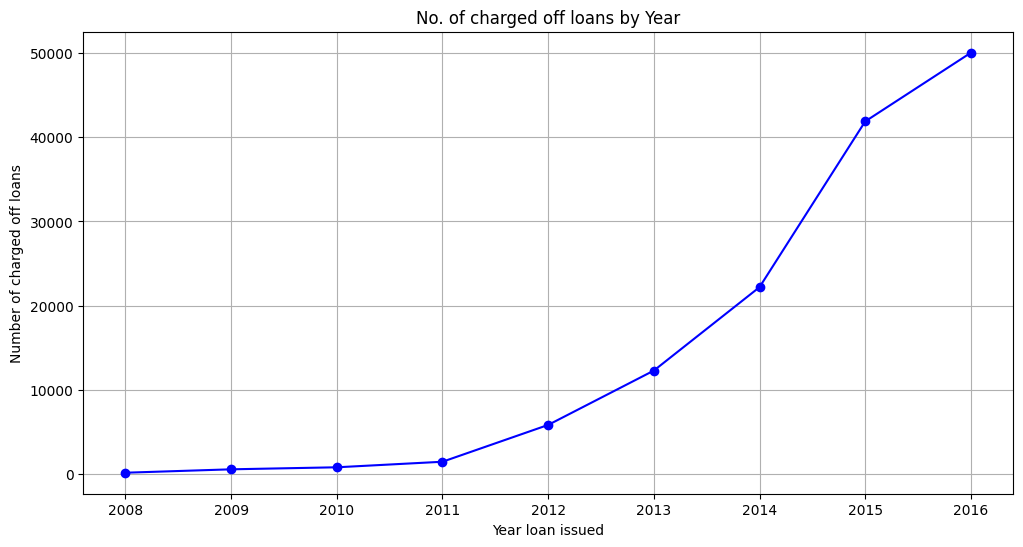

In [ ]:
charged_off_per_year = df[df['loan_status'] == 'Charged Off'].groupby('year')['loan_status'].count().reset_index()

print(charged_off_per_year)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(charged_off_per_year['year'], charged_off_per_year['loan_status'], marker='o', color='blue')
plt.title('No. of charged off loans by Year')
plt.xlabel('Year loan issued')
plt.ylabel('Number of charged off loans')
plt.grid()
plt.show()

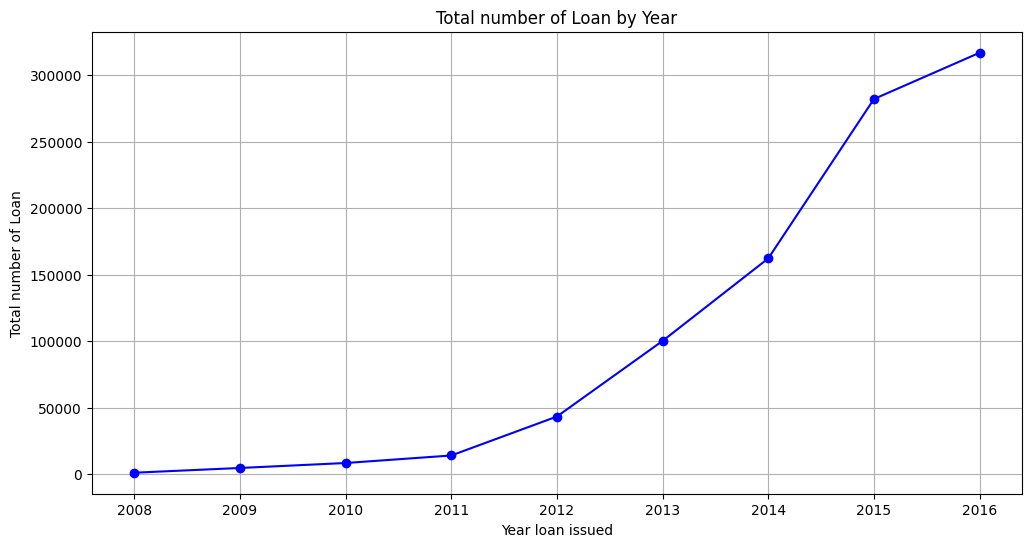

In [ ]:
# plot of no. of loans per year
loan_per_year = df.groupby('year')['funded_amnt'].count().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(loan_per_year['year'], loan_per_year['funded_amnt'], marker='o', color='blue')
plt.title('Total number of Loan by Year')
plt.xlabel('Year loan issued')
plt.ylabel('Total number of Loan')
plt.grid()
plt.show()



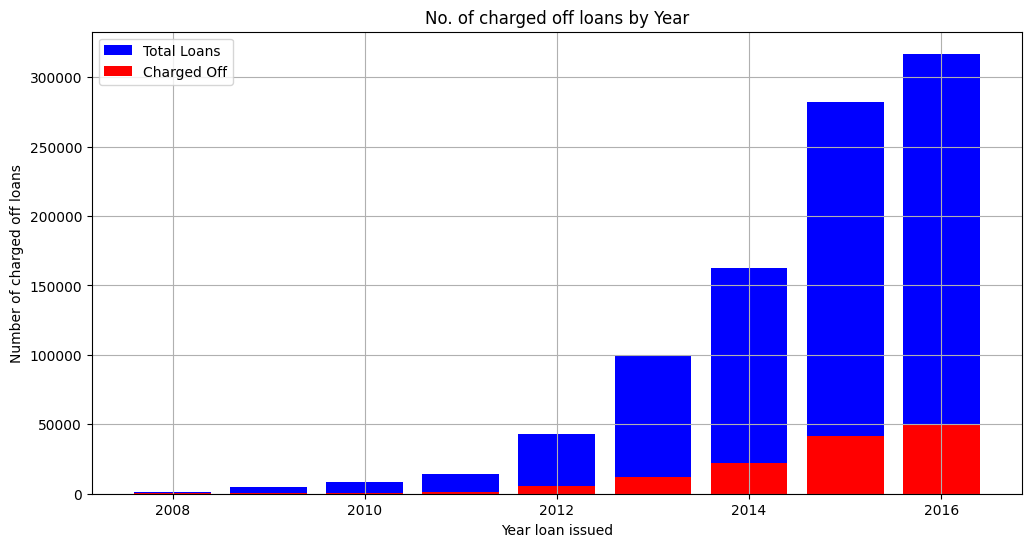

In [ ]:
# bar graph of number of loans per year and how many are charged off

plt.figure(figsize=(12, 6))
plt.bar(loan_per_year['year'], loan_per_year['funded_amnt'], color='blue', label='Total Loans')
plt.bar(charged_off_per_year['year'], charged_off_per_year['loan_status'], color='red', label='Charged Off')
plt.title('No. of charged off loans by Year')
plt.xlabel('Year loan issued')
plt.ylabel('Number of charged off loans')
plt.legend()
plt.grid()
plt.show()

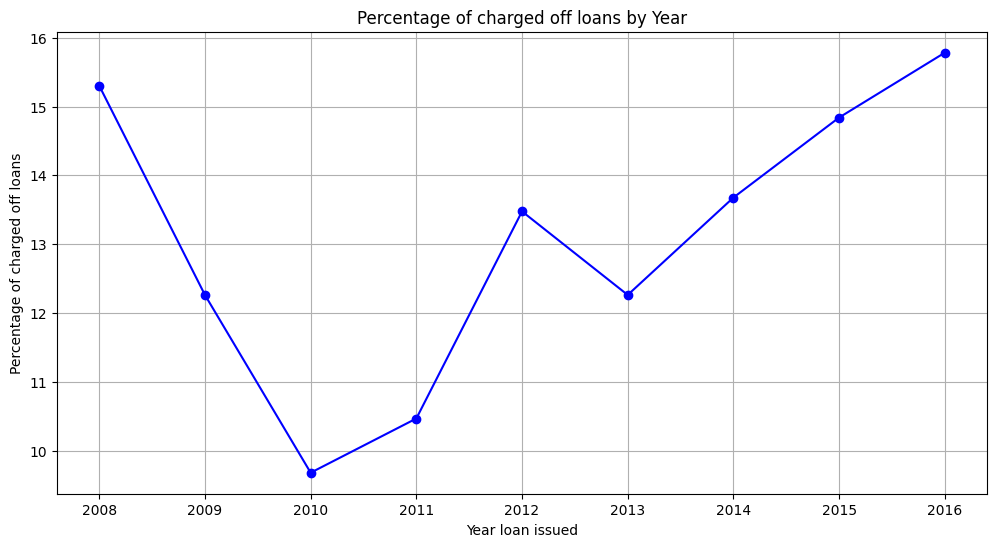

In [ ]:
# plot with percentage of loans charged off per year

plt.figure(figsize=(12, 6))
plt.plot(loan_per_year['year'], charged_off_per_year['loan_status']/loan_per_year['funded_amnt'] * 100, marker='o', color='blue')
plt.title('Percentage of charged off loans by Year')
plt.xlabel('Year loan issued')
plt.ylabel('Percentage of charged off loans')
plt.grid()
plt.show()

The above plot shows that no. of loans has been increasing througout the years while the percentage of charged off loans are consistently between 9 - 16%. This indicate a major imbalance between the two classes.

### Box Plot

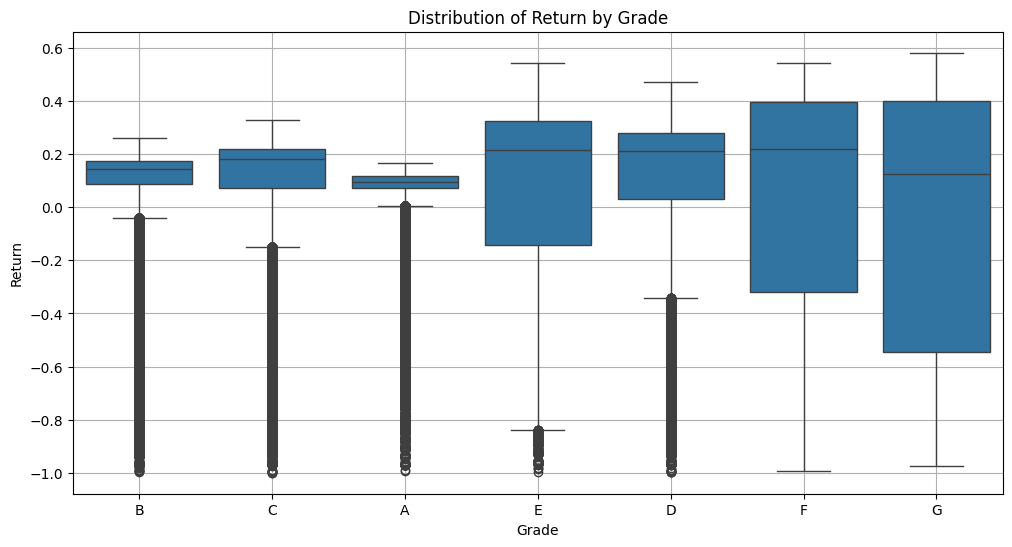

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='grade',y='return',data=df)
plt.title('Distribution of Return by Grade')
plt.xlabel('Grade')
plt.ylabel('Return')
plt.grid()
plt.show()

The above plot shows how returns are distributed in each grade. After grade E, the return has more negative returns



### Scatter Plots

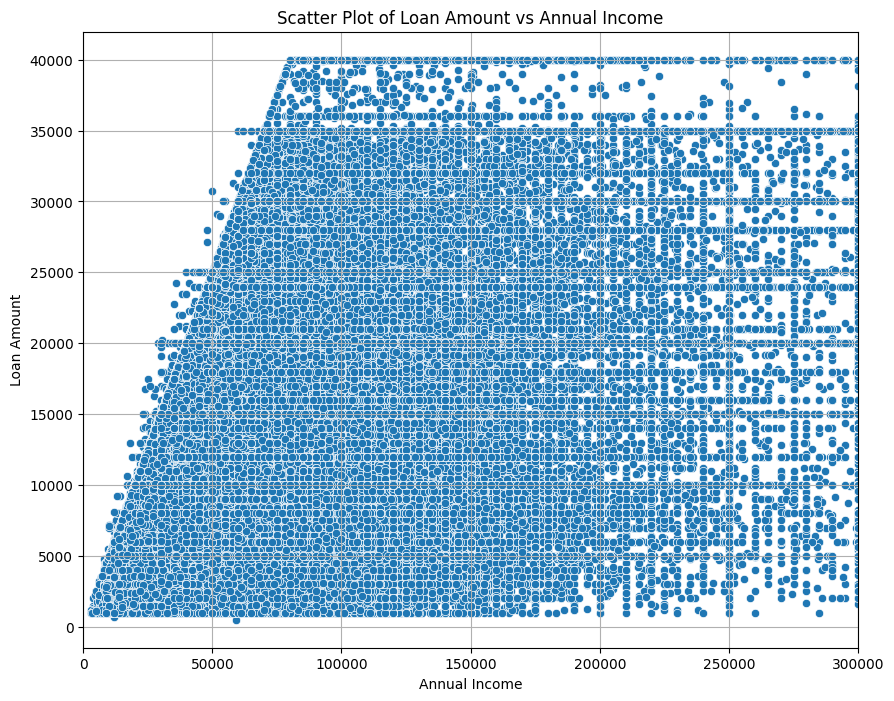

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x="annual_inc",y="funded_amnt")
plt.xlim(0, 300000)
plt.title("Scatter Plot of Loan Amount vs Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.grid()
plt.show()


### Histograms

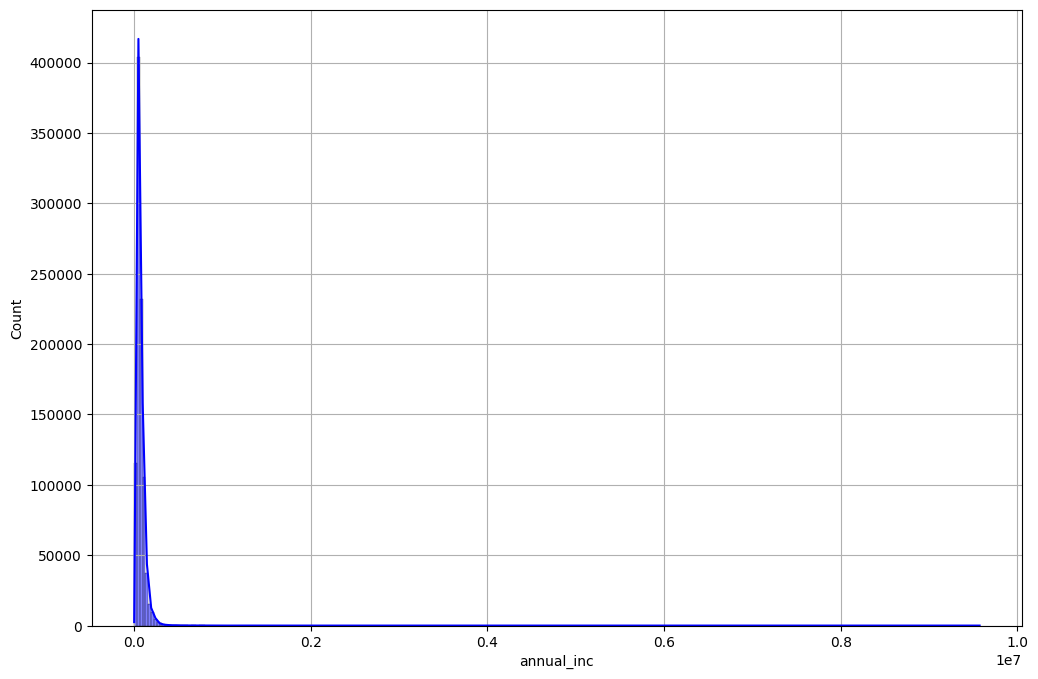

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df['annual_inc'], kde=True, bins=300, color="blue", alpha=0.5)
plt.grid()
plt.show()

The histogram of annual income looks very skewed. Taking the log of the income should make it more normal.

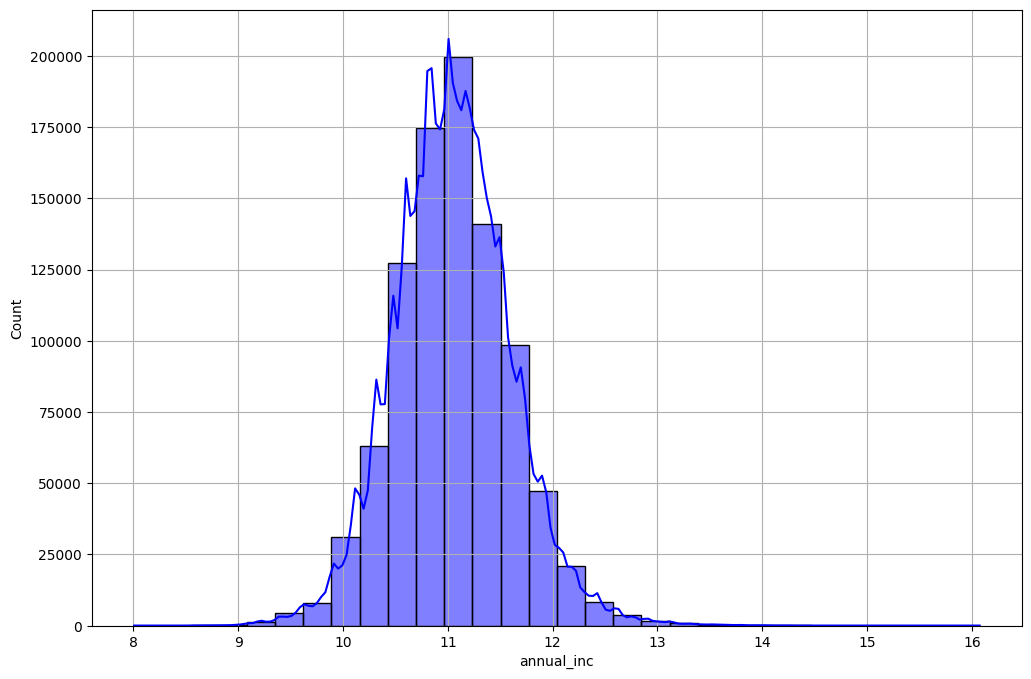

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(np.log1p(df['annual_inc']), kde=True, bins=30, color="blue", alpha=0.5)
plt.grid()
plt.show()

The histogram of log annual income loooks more normal than before.

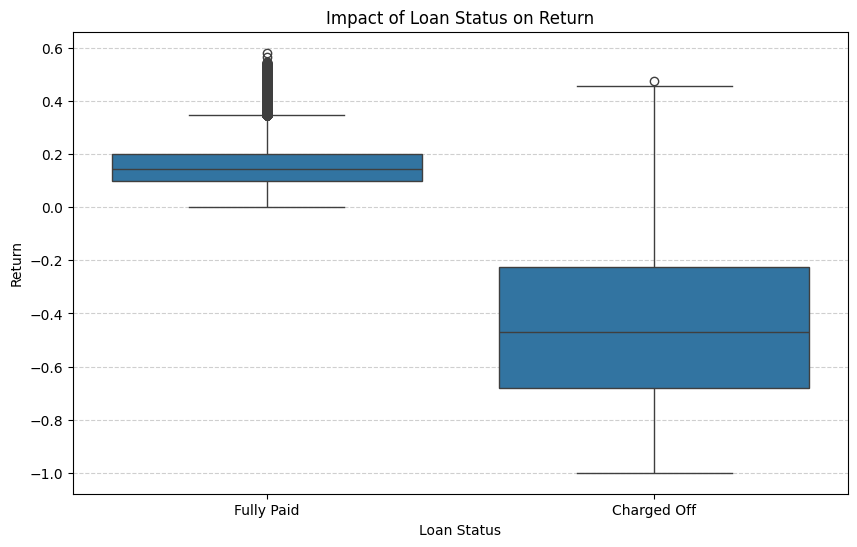

In [ ]:
#plot to see how loan_status impacts the return

plt.figure(figsize=(10, 6))
sns.boxplot(x="loan_status", y="return", data=df)

plt.title("Impact of Loan Status on Return")
plt.xlabel("Loan Status")
plt.ylabel("Return")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


Majority of charged off loans have negative returns while some still have small positive returns.

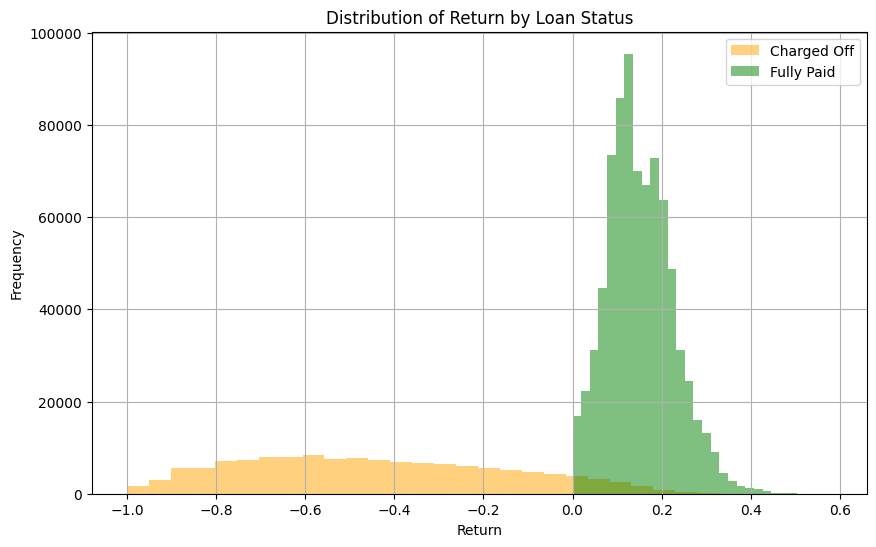

In [ ]:
charged_df = df[df['loan_status'] == 'Charged Off']
fully_paid_df = df[df['loan_status'] == 'Fully Paid']

plt.figure(figsize=(10, 6))
plt.hist(charged_df['return'], bins=30, alpha=0.5, label='Charged Off', color='orange')
plt.hist(fully_paid_df['return'], bins=30, alpha=0.5, label='Fully Paid', color='green')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Distribution of Return by Loan Status')
plt.legend()
plt.grid()
plt.show()

# Modification of Data

### Handling missing values

In [ ]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple.
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(df)

,Total,Percent
mths_since_last_delinq,464293,49.75
emp_length,58768,6.30


Function to fill the missing data specially emp_length if it is empty that might indicate no employemnet which can be categorized as less than 1 year. There are almost 50% missing data for months since last deliquencies which indicate that they have never haddelinquency before. Therefore, the column has been filled using maximum value.

### Filling Missing Data

In [ ]:
# mths_since_last_delinq
df['dummy_delinq'] = df['mths_since_last_delinq'].isnull().astype(int)
max_delinq = df['mths_since_last_delinq'].max()
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(max_delinq)
df['inter_delinq'] = df['dummy_delinq'] * df['mths_since_last_delinq']

# emp_length
df['emp_length'] = df['emp_length'].map({"< 1 year": 0, "1 year": 1, "2 years": 2, "3 years": 3, "4 years": 4, "5 years": 5,
 "6 years": 6, "7 years": 7, "8 years": 8, "9 years": 9, "10+ years": 10})
average_emp_length = df['emp_length'].mean()
df['emp_length'] = df['emp_length'].fillna(average_emp_length)

In [ ]:
missing_percentage(df)

,Total,Percent


Now we have no missing data.

Getting all the non numeric features of our data set.

In [ ]:
# Identify all non-numeric features
non_numeric_features = df.select_dtypes(include=["object"]).columns.tolist()

print("Non-Numeric Features:", non_numeric_features)

Non-Numeric Features: ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line']


### Label encoding

We can label encode the ordinal categorical values like grade, verification status. We have dropped sub_grade because it is similar to grade.

In [ ]:
def label_encoding(df):
  df.drop(columns=['sub_grade'], inplace=True)
  df['grade'] = df['grade'].map({"NA": 0, "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7})
  df['verification_status'] = df['verification_status'].map({
            "Not Verified": 0, "Verified": 1, "Source Verified": 1
        })

label_encoding(df)

### One-hot encoding

Home ownership is a nominal category with four distinct values, so we can one-hot encode it.

In [ ]:
# homeownership
home_ownership_dummies = pd.get_dummies(df['home_ownership'], prefix='home', drop_first=False).astype(int)
home_ownership_dummies.drop(columns=["home_ANY", "home_OTHER", "home_NONE"], inplace=True)
df = pd.concat([df, home_ownership_dummies], axis=1)
df.drop(columns=['home_ownership'], inplace=True)

# purpose
purpose_dummies = pd.get_dummies(df['purpose'], prefix='purpose', drop_first=True).astype(int)
df = pd.concat([df, purpose_dummies], axis=1)
df.drop(columns=['purpose'], inplace=True)

### Feature Engineering

Adding features like length of credit, verified income, and using address and average income of that state to create a new interaction feature.

In [ ]:
# earliest_cr_line
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df['length_credit'] = (df['issue_d'] - df['earliest_cr_line']).dt.days / 365.25
df.drop(columns=['earliest_cr_line'], inplace=True)
df.drop(columns=['issue_d'], inplace=True)

#interaction term: Annual income and verification
df['inter_income'] = df['verification_status'] * df['annual_inc']

# feature engineering: create a new feature state_income
state_income = df[df['verification_status'] == 1].groupby(['addr_state', 'year'])['annual_inc'].mean().reset_index()
state_income.rename(columns={'annual_inc': 'state_income'}, inplace=True)

df = df.merge(state_income, on=['addr_state', 'year'], how='left')
df['state_income'] = df['state_income'].fillna(df['state_income'].mean())

# non linear term
df['log_income'] = np.log1p(df['annual_inc'])
df['int_rate_squared'] = df['int_rate'] ** 2

# drop the location related features
df.drop(columns=['addr_state','zip_code'], inplace=True)

We have created new non linear features and dropped feature like address because we have already used address to create a new interaction feature.

### Scaling

Scaling the numerical features for each year.

In [ ]:
scale_fea_set = ['funded_amnt', 'emp_length', 'annual_inc',
                'dti', 'delinq_2yrs', 'fico_range_low', 'inq_last_6mths',
                'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
                'revol_util', 'total_acc', 'collections_12_mths_ex_med',
                'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
                'pub_rec_bankruptcies', 'tax_liens', 'inter_delinq',
                'length_credit', 'inter_income', 'state_income']

# Standardize the features in scale_fea_set for data
scaled_df = pd.DataFrame(columns=df.columns)

# Use a list to collect scaled dataframes for concatenation
scaled_dataframes = []

for year, data in df.groupby('year'):
    scaler = StandardScaler()
    # Standardize the features
    data[scale_fea_set] = scaler.fit_transform(data[scale_fea_set])
    # Append the scaled data to the list
    scaled_dataframes.append(data)

# Concatenate all scaled dataframes at once
scaled_df = pd.concat(scaled_dataframes, ignore_index=True)

# Logistic Regression

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
log_df = df.copy()

Making the loan_status as a binary value which we will use to train our model.

In [ ]:
log_df['loan_status'] = [1 if x == "Fully Paid" else 0 for x in log_df['loan_status']]

### Using rolling window


Getting all the to be scaled features, features to be excluded and creating two new columns for in-sample and out-of-sample probabilities.

In [ ]:
# Convert 'date' to datetime format for easier filtering
# scaled_df['year'] = pd.to_datetime(scaled_df['year'])

scale_fea_set = ['funded_amnt', 'emp_length', 'annual_inc',
                'dti', 'delinq_2yrs', 'fico_range_low', 'inq_last_6mths',
                'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
                'revol_util', 'total_acc', 'collections_12_mths_ex_med',
                'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
                'pub_rec_bankruptcies', 'tax_liens',
                'length_credit', 'inter_income', 'state_income', 'log_income']

# Create two new columns for recording the predictions
log_df['prob_is'] = np.nan
log_df['prob_oos'] = np.nan

# A list of variables that are not inputs
fea_non_X = ['loan_status', 'year', 'early_default', 'return', 'prob_is', 'prob_oos']

# Define the start and end dates for the training and validation sets
start_year = 2008
end_year = 2015

Using two years rolling window to train the model, each two year model will be used to predict the next year validation set. We are also removing highly correalted features, doing SMOTE to balancce the class, standardizing the numerical features and removing the constant features to makre sure we don't get singular matrix error.

In [ ]:
# Loop through each period using a 2-year rolling window
current_year = start_year  # Ensure this is an integer
iteration_number = 0
while current_year < end_year:  # Ensure at least 1 year for validation
    # Define the training and validation periods
    train_start = current_year
    train_end = current_year + 2  # Training period = 2 years
    val_start = train_end
    val_end = val_start + 1  # Validation period = next year

    # Create training and validation sets
    train_set = log_df[(log_df['year'] >= train_start) & (log_df['year'] < train_end)]
    val_set = log_df[log_df['year'] == val_start]

    # 🚨 Debug Print: Check initial dataset sizes
    print(f"Iteration: {iteration_number} | Training Years: {train_start}-{train_end-1} | Validation Year: {val_start}")
    print(f"Initial X_train shape: {train_set.shape}, X_val shape: {val_set.shape}")

    # Prepare the features and target variable
    X_train = train_set.drop(columns=fea_non_X)
    y_clf_train = train_set['loan_status']
    X_val = val_set.drop(columns=fea_non_X)
    y_clf_val = val_set['loan_status']

    # Remove highly correlated features BEFORE SMOTE
    X_train = X_train.drop(columns=[ 'dummy_delinq', 'inter_delinq'])
    X_val = X_val.drop(columns=[ 'dummy_delinq', 'inter_delinq'])

    # 🚨 Debug Print: Shape before SMOTE
    print(f"Before SMOTE | X_train shape: {X_train.shape}, y_clf_train shape: {y_clf_train.shape}")

    # Apply SMOTE
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_balanced, y_clf_train_balanced = smote.fit_resample(X_train, y_clf_train)
    X_train_prediction = X_train.copy()

    # 🚨 Debug Print: Shape after SMOTE
    print(f"After SMOTE | X_train_balanced shape: {X_train_balanced.shape}, y_clf_train_balanced shape: {y_clf_train_balanced.shape}")

    # Standardizing features
    scaler = StandardScaler()
    X_train_balanced[scale_fea_set] = scaler.fit_transform(X_train_balanced[scale_fea_set])
    X_train_prediction[scale_fea_set] = scaler.transform(X_train_prediction[scale_fea_set])
    X_val[scale_fea_set] = scaler.transform(X_val[scale_fea_set])

    # 🚨 Debug Print: Shape after Standardization
    print(f"After Standardization | X_train_balanced shape: {X_train_balanced.shape}, X_val shape: {X_val.shape}")

    # Remove constant features
    constant_columns = X_train_balanced.columns[X_train_balanced.nunique() <= 1]
    if len(constant_columns) > 0:
        print("Dropping constant columns:", constant_columns.tolist())
    X_train_balanced = X_train_balanced.drop(columns=constant_columns)
    X_train_prediction = X_train_prediction.drop(columns=constant_columns)
    X_val = X_val.drop(columns=constant_columns)

    # 🚨 Debug Print: Shape after Dropping Constant Features
    print(f"After Dropping Constant Features | X_train_balanced shape: {X_train_balanced.shape}, X_val shape: {X_val.shape}")

    # adding constant term before fitting
    X_train_balanced = sm.add_constant(X_train_balanced)
    X_train_prediction = sm.add_constant(X_train_prediction)
    X_val = sm.add_constant(X_val, has_constant='add')

    print(f"After Adding Constant Features | X_train_balanced shape: {X_train_balanced.shape}, X_val shape: {X_val.shape}")


    # 🚨 Debug Print: Final shapes before Model Training
    print(f"Final Shapes Before Fitting Model")
    print(f"X_train_balanced shape: {X_train_balanced.shape}, y_clf_train_balanced shape: {y_clf_train_balanced.shape}")
    print(f"X_val shape: {X_val.shape}, y_clf_val shape: {y_clf_val.shape}")
    print("-" * 50, "\n")

    # Fit the logistic regression model
    log_model_rolling = sm.Logit(y_clf_train_balanced, X_train_balanced).fit()

    # Predict on training and validation sets
    y_clf_train_pred = log_model_rolling.predict(X_train_prediction)
    y_clf_val_pred = log_model_rolling.predict(X_val)

    # 🚨 Ensure index alignment when storing probabilities
    log_df.loc[train_set.index, 'prob_is'] = y_clf_train_pred.values
    log_df.loc[val_set.index, 'prob_oos'] = y_clf_val_pred.values

    # Move to the next year
    current_year += 1
    iteration_number += 1


Iteration: 0 | Training Years: 2008-2009 | Validation Year: 2010
Initial X_train shape: (5763, 51), X_val shape: (8399, 51)
Before SMOTE | X_train shape: (5763, 43), y_clf_train shape: (5763,)
After SMOTE | X_train_balanced shape: (10046, 43), y_clf_train_balanced shape: (10046,)
After Standardization | X_train_balanced shape: (10046, 43), X_val shape: (8399, 43)
Dropping constant columns: ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
After Dropping Constant Features | X_train_balanced shape: (10046, 38), X_val shape: (8399, 38)
After Adding Constant Features | X_train_balanced shape: (10046, 39), X_val shape: (8399, 39)
Final Shapes Before Fitting Model
X_train_balanced shape: (10046, 39), y_clf_train_balanced shape: (10046,)
X_val shape: (8399, 39), y_clf_val shape: (8399,)
-------------------------------------------------- 

         Current function value: 0.342547
         Iterations: 35
Iteration: 1 | Training Years: 2009

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.303217
         Iterations 9
Iteration: 2 | Training Years: 2010-2011 | Validation Year: 2012
Initial X_train shape: (22452, 51), X_val shape: (43342, 51)
Before SMOTE | X_train shape: (22452, 43), y_clf_train shape: (22452,)
After SMOTE | X_train_balanced shape: (40336, 43), y_clf_train_balanced shape: (40336,)
After Standardization | X_train_balanced shape: (40336, 43), X_val shape: (43342, 43)
Dropping constant columns: ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
After Dropping Constant Features | X_train_balanced shape: (40336, 38), X_val shape: (43342, 38)
After Adding Constant Features | X_train_balanced shape: (40336, 39), X_val shape: (43342, 39)
Final Shapes Before Fitting Model
X_train_balanced shape: (40336, 39), y_clf_train_balanced shape: (40336,)
X_val shape: (43342, 39), y_clf_val shape: (43342,)
-------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


After SMOTE | X_train_balanced shape: (100166, 43), y_clf_train_balanced shape: (100166,)
After Standardization | X_train_balanced shape: (100166, 43), X_val shape: (100231, 43)
Dropping constant columns: ['purpose_educational']
After Dropping Constant Features | X_train_balanced shape: (100166, 42), X_val shape: (100231, 42)
After Adding Constant Features | X_train_balanced shape: (100166, 43), X_val shape: (100231, 43)
Final Shapes Before Fitting Model
X_train_balanced shape: (100166, 43), y_clf_train_balanced shape: (100166,)
X_val shape: (100231, 43), y_clf_val shape: (100231,)
-------------------------------------------------- 

         Current function value: 0.341186
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Iteration: 4 | Training Years: 2012-2013 | Validation Year: 2014
Initial X_train shape: (143573, 51), X_val shape: (162279, 51)
Before SMOTE | X_train shape: (143573, 43), y_clf_train shape: (143573,)
After SMOTE | X_train_balanced shape: (250882, 43), y_clf_train_balanced shape: (250882,)
After Standardization | X_train_balanced shape: (250882, 43), X_val shape: (162279, 43)
Dropping constant columns: ['purpose_educational']
After Dropping Constant Features | X_train_balanced shape: (250882, 42), X_val shape: (162279, 42)
After Adding Constant Features | X_train_balanced shape: (250882, 43), X_val shape: (162279, 43)
Final Shapes Before Fitting Model
X_train_balanced shape: (250882, 43), y_clf_train_balanced shape: (250882,)
X_val shape: (162279, 43), y_clf_val shape: (162279,)
-------------------------------------------------- 

Optimization terminated successfully.
         Current function value: 0.336644
         Iterations 11
Iteration: 5 | Training Years: 2013-2014 | Validation 

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Assessing our Logit Model

In [ ]:
# split the in-sample and out-of-sample predictions
is_pred = log_df[['loan_status', 'prob_is']].dropna()
oos_pred = log_df[['loan_status', 'prob_oos']].dropna()

# Calculate AUC for in-sample and out-of-sample predictions
auc_score_is = roc_auc_score(is_pred['loan_status'], is_pred['prob_is'])
auc_score_oos = roc_auc_score(oos_pred['loan_status'], oos_pred['prob_oos'])

# Print the results
print(f"In-sample AUC: {auc_score_is:.4f}")
print(f"Out-of-sample AUC: {auc_score_oos:.4f}")

In-sample AUC: 0.6362
Out-of-sample AUC: 0.6281


In [ ]:
# tuning the decision threshold for binary classification
thresholds = [round(i, 2) for i in np.arange(0.05, 0.95, 0.05)]

f1_scores_is, f1_scores_oos = [], []  # Initialize lists for f1 scores
acc_scores_is, acc_scores_oos = [], []  # Initialize lists for accuracy scores

for td in thresholds:
    binary_pred_is = [1 if p > td else 0 for p in is_pred['prob_is']]
    binary_pred_oos = [1 if p > td else 0 for p in oos_pred['prob_oos']]

    # Calculate f1 scores
    f1_scores_is.append(f1_score(is_pred['loan_status'], binary_pred_is))
    f1_scores_oos.append(f1_score(oos_pred['loan_status'], binary_pred_oos))

    # Calculate accuracy scores
    acc_scores_is.append(accuracy_score(is_pred['loan_status'], binary_pred_is))
    acc_scores_oos.append(accuracy_score(oos_pred['loan_status'], binary_pred_oos))

results_df = pd.DataFrame({
    'threshold': thresholds,
    'f1_score_is': f1_scores_is,
    'f1_score_oos': f1_scores_oos,
    'acc_score_is': acc_scores_is,  # Add accuracy scores to the results
    'acc_score_oos': acc_scores_oos   # Add accuracy scores to the results
})

# Sort the dataframe by f1_scores_oos
results_df = results_df.sort_values(by='acc_score_oos', ascending=False).reset_index(drop=True)

# Display the results dataframe
results_df

,threshold,f1_score_is,f1_score_oos,acc_score_is,acc_score_oos
0,0.05,0.924447,0.920723,0.859594,0.853188
1,0.10,0.923149,0.919019,0.857409,0.850395
2,0.15,0.922380,0.917397,0.856108,0.847784
3,0.20,0.921846,0.915853,0.855206,0.845372
4,0.25,0.921358,0.914165,0.854399,0.842749
5,0.30,0.920738,0.912192,0.853422,0.839713
6,0.35,0.919440,0.909815,0.851382,0.836084
7,0.40,0.916702,0.906729,0.847090,0.831393
8,0.45,0.911714,0.902555,0.839333,0.825084
9,0.50,0.903217,0.896957,0.826267,0.816717


In [ ]:
# get the optimal threshold
optimal_td = 0.05

# Make predictions based on the optimal threshold
binary_pred_oos_optimal = [1 if p > optimal_td else 0 for p in oos_pred['prob_oos']]

# Print out the confusion matrix out-of-sample
conf_matrix_oos = confusion_matrix(oos_pred['loan_status'], binary_pred_oos_optimal)
print("Out-of-sample Confusion Matrix:")
print(conf_matrix_oos)

Out-of-sample Confusion Matrix:
[[   601 133901]
 [  2252 790643]]


Our confsion matrix has relatively low false positive and false negative.

# Logistic Regression without Rolling Window


We also trained our model without using rolling window to compare with the rolling window.

In [ ]:
def logit_fit_ready(dataFrame):
  # A list of variables that are not inputs
  y_train, y_val = train_test_split(dataFrame['loan_status'], test_size=0.3, random_state=42)
  fea_non_X = ['loan_status', 'year', 'early_default', 'return']
  dataFrame = dataFrame.drop(columns=fea_non_X)
  # Split the data into training and testing sets
  X_train, X_val = train_test_split(dataFrame, test_size=0.3, random_state=42)
  return X_train, X_val, y_train, y_val


In [ ]:
X_log_train, X_log_val, y_log_train, y_log_val = logit_fit_ready(scaled_df.copy())

In [ ]:
y_log_train = [1 if x == "Fully Paid" else 0 for x in y_log_train]
y_log_val = [1 if x == "Fully Paid" else 0 for x in y_log_val]

In [ ]:
X_log_train.head()

,funded_amnt,int_rate,grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,fico_range_low,inq_last_6mths,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,length_credit,inter_income,state_income,log_income,int_rate_squared
294287,1.455595,0.0790,1,-1.671700,1.335149,0,-0.651832,0.710736,0.082379,0.236001,...,0,0,0,0,0,1.588710,-0.758570,-2.766351,11.918397,0.006241
664837,-1.275431,0.1075,2,1.132723,0.411619,0,0.699476,-0.381711,-0.478507,0.507491,...,0,0,0,0,0,1.728069,-0.704741,-0.645229,11.589896,0.011556
659935,0.858893,0.1075,2,-1.100107,0.905084,1,-0.363815,-0.381711,-0.950330,2.826392,...,0,0,0,0,0,0.557170,1.122502,0.056359,11.884496,0.011556
336162,0.024403,0.0532,1,-0.523642,0.150613,0,0.007898,-0.375418,3.614617,-0.661201,...,0,0,0,0,0,0.073877,-0.681082,0.788805,11.362114,0.002830
885808,-0.735987,0.1349,3,1.132723,0.104870,1,1.609542,-0.381711,-0.163959,0.507491,...,0,0,0,0,0,0.110430,0.366402,-1.483205,11.350418,0.018198


In [ ]:

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_log_train_balanced, y_log_train_balanced = smote.fit_resample(X_log_train, y_log_train)
X_train_prediction = X_log_train.copy()

In [ ]:
X_log_train_balanced = sm.add_constant(X_log_train_balanced)
X_train_prediction = sm.add_constant(X_train_prediction)
X_log_val = sm.add_constant(X_log_val, has_constant='add')

log_model_all = sm.Logit(y_log_train_balanced, X_log_train_balanced).fit()

Optimization terminated successfully.
         Current function value: 0.542188
         Iterations 10


In [ ]:
y_pred_log_train = log_model_all.predict(X_train_prediction)
y_pred_log_val = log_model_all.predict(X_log_val)

In [ ]:

# Calculate AUC for in-sample and out-of-sample predictions
auc_score_is = roc_auc_score(y_log_train, y_pred_log_train)
auc_score_oos = roc_auc_score(y_log_val, y_pred_log_val)

# Print the results
print(f"In-sample AUC: {auc_score_is:.4f}")
print(f"Out-of-sample AUC: {auc_score_oos:.4f}")

In-sample AUC: 0.6413
Out-of-sample AUC: 0.6414


In [ ]:
# tuning the decision threshold for binary classification
thresholds = [round(i, 2) for i in np.arange(0.05, 0.95, 0.05)]

f1_scores_is, f1_scores_oos = [], []  # Initialize lists for f1 scores
acc_scores_is, acc_scores_oos = [], []  # Initialize lists for accuracy scores

for td in thresholds:
    binary_pred_is = [1 if p > td else 0 for p in y_pred_log_train]
    binary_pred_oos = [1 if p > td else 0 for p in y_pred_log_val]

    # Calculate f1 scores
    f1_scores_is.append(f1_score(y_log_train, binary_pred_is))
    f1_scores_oos.append(f1_score(y_log_val, binary_pred_oos))

    # Calculate accuracy scores
    acc_scores_is.append(accuracy_score(y_log_train, binary_pred_is))
    acc_scores_oos.append(accuracy_score(y_log_val, binary_pred_oos))

results_df = pd.DataFrame({
    'threshold': thresholds,
    'f1_score_is': f1_scores_is,
    'f1_score_oos': f1_scores_oos,
    'acc_score_is': acc_scores_is,  # Add accuracy scores to the results
    'acc_score_oos': acc_scores_oos   # Add accuracy scores to the results
})

# Sort the dataframe by f1_scores_oos
results_df = results_df.sort_values(by='acc_score_oos', ascending=False).reset_index(drop=True)

# Display the results dataframe
results_df

,threshold,f1_score_is,f1_score_oos,acc_score_is,acc_score_oos
0,0.05,0.920607,0.920927,0.852986,0.853534
1,0.10,0.919156,0.919454,0.850568,0.851076
2,0.15,0.918165,0.918381,0.848948,0.849315
3,0.20,0.916864,0.917090,0.846955,0.847336
4,0.25,0.913708,0.914236,0.842131,0.843039
5,0.30,0.906907,0.907465,0.831802,0.832805
6,0.35,0.893995,0.894251,0.812569,0.813033
7,0.40,0.873012,0.873222,0.782510,0.782845
8,0.45,0.842896,0.843017,0.741958,0.741984
9,0.50,0.802066,0.802314,0.691036,0.691164


In [ ]:
# get the optimal threshold
optimal_td = 0.05

# Make predictions based on the optimal threshold
binary_pred_oos_optimal = [1 if p > optimal_td else 0 for p in y_pred_log_val]

# Print out the confusion matrix out-of-sample
conf_matrix_oos = confusion_matrix(y_log_val, binary_pred_oos_optimal)
print("Out-of-sample Confusion Matrix:")
print(conf_matrix_oos)

Out-of-sample Confusion Matrix:
[[   174  40268]
 [   735 238771]]


The AUC score without using rolling window was better than the model using rolling window.

### Fitting LR without rolling window

Now we fit the linear model with the probability predicted by our logistic model.

In [ ]:
X_reg_train, X_reg_val, _, __ = logit_fit_ready(scaled_df.copy())

In [ ]:
y_reg_train, y_reg_val = train_test_split(scaled_df['return'], test_size=0.3, random_state=42)


In [ ]:
X_reg_train['prob_loan_status'] = y_pred_log_train
X_reg_val['prob_loan_status'] = y_pred_log_val

X_reg_train = sm.add_constant(X_reg_train)
X_reg_val = sm.add_constant(X_reg_val, has_constant='add')

In [ ]:
X_reg_train.columns

Index(['const', 'funded_amnt', 'int_rate', 'grade', 'emp_length', 'annual_inc',
       'verification_status', 'dti', 'delinq_2yrs', 'fico_range_low',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'dummy_delinq', 'inter_delinq',
       'home_MORTGAGE', 'home_OWN', 'home_RENT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'length_credit', 'inter_income',
       'state_income', 'log_income', 'int_rate_squared', 'prob_loan_status'],
      dtype='object')

In [ ]:
reg_model_all = sm.OLS(y_reg_train, X_reg_train).fit()

In [ ]:
y_pred_reg_train = reg_model_all.predict(X_reg_train)
y_pred_reg_val = reg_model_all.predict(X_reg_val)

is_score = calculate_r2(y_reg_train, y_pred_reg_train, in_sample=True)
oos_score = calculate_r2(y_reg_val, y_pred_reg_val, in_sample=False, benchmark=y_reg_train.mean())

print(f"In-sample R-squared: {is_score*100:.2f}%; Out-of-Sample R-squared: {oos_score*100:.2f}%")

In-sample R-squared: 1.22%; Out-of-Sample R-squared: 1.22%


# Linear Regression after Logistic:

Function to calculate the r2 score of the linear model.

In [ ]:
def calculate_r2(y_true, y_pred, in_sample=True, benchmark=None):
    if in_sample:
        return 1 - (np.sum((y_true - y_pred) ** 2) /
                    np.sum((y_true - np.mean(y_true)) ** 2))
    else:
        if benchmark is None:
            raise ValueError("Benchmark must be provided for out-of-sample R-squared calculation.")
        return 1 - (np.sum((y_true - y_pred) ** 2) /
                    np.sum((y_true - benchmark) ** 2))

In [ ]:
lr_df = log_df.copy()

In [ ]:
lr_df['prob_oos'].fillna(lr_df['prob_oos'].mean(), inplace=True)

<ipython-input-67-26d0354f3138>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lr_df['prob_oos'].fillna(lr_df['prob_oos'].mean(), inplace=True)


### Before adding predicted probability of loan_status

In [ ]:
# Initialize lists to store R-squared values
in_sample_r2, out_of_sample_r2 = [], []
# Loop through each period using a 2-year rolling window
current_year = start_year  # Ensure this is an integer
iteration_number = 0
while current_year < end_year:  # Ensure at least 1 year for validation
    # Define the training and validation periods
    train_start = current_year
    train_end = current_year + 2  # Training period = 2 years
    val_start = train_end
    val_end = val_start + 1  # Validation period = next year

    # Create training and validation sets
    train_set = lr_df[(lr_df['year'] >= train_start) & (lr_df['year'] < train_end)]
    val_set = lr_df[lr_df['year'] == val_start]

    # Prepare the features and target variable
    X_train = train_set.drop(columns=fea_non_X)
    y_reg_train = train_set['return']
    X_val = val_set.drop(columns=fea_non_X)
    y_reg_val = val_set['return']

    # 🚨 Debug Print: Check initial dataset sizes
    print(f"Iteration: {iteration_number} | Training Years: {train_start}-{train_end-1} | Validation Year: {val_start}")
    print(f"Initial X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")


    # Standardizing features
    scaler = StandardScaler()
    X_train[X_train.columns] = scaler.fit_transform(X_train)
    X_val[X_val.columns] = scaler.transform(X_val)

    # Remove constant features
    constant_columns = X_train.columns[X_train.nunique() <= 1]
    if len(constant_columns) > 0:
        print("Dropping constant columns:", constant_columns.tolist())
    X_train = X_train.drop(columns=constant_columns)
    X_val = X_val.drop(columns=constant_columns)

    # 🚨 Debug Print: Shape after Dropping Constant Features
    print(f"After Dropping Constant Features | X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")

    # adding constant term before fitting
    X_train = sm.add_constant(X_train)
    X_val = sm.add_constant(X_val, has_constant='add')

    print(f"After Adding Constant Features | X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")


    # 🚨 Debug Print: Final shapes before Model Training
    print(f"Final Shapes Before Fitting Model")
    print(f"X_train shape: {X_train.shape}, y_reg_train shape: {y_reg_train.shape}")
    print(f"X_val shape: {X_val.shape}, y_reg_val shape: {y_reg_val.shape}")
    print("-" * 50, "\n")

    # Fit the logistic regression model
    reg_model_before = sm.OLS(y_reg_train, X_train).fit()

    # Predict on training and validation sets
    y_reg_train_pred = reg_model_before.predict(X_train)
    y_reg_val_pred = reg_model_before.predict(X_val)


    # Calculate R-squared values
    in_sample_r2.append(calculate_r2(y_reg_train, y_reg_train_pred, in_sample=True))
    out_of_sample_r2.append(calculate_r2(y_reg_val, y_reg_val_pred, in_sample=False, benchmark = 0))

    # Move to the next year
    current_year += 1
    iteration_number += 1


Iteration: 0 | Training Years: 2008-2009 | Validation Year: 2010
Initial X_train shape: (5763, 45), X_val shape: (8399, 45)
Dropping constant columns: ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
After Dropping Constant Features | X_train shape: (5763, 40), X_val shape: (8399, 40)
After Adding Constant Features | X_train shape: (5763, 41), X_val shape: (8399, 41)
Final Shapes Before Fitting Model
X_train shape: (5763, 41), y_reg_train shape: (5763,)
X_val shape: (8399, 41), y_reg_val shape: (8399,)
-------------------------------------------------- 

Iteration: 1 | Training Years: 2009-2010 | Validation Year: 2011
Initial X_train shape: (13064, 45), X_val shape: (14053, 45)
Dropping constant columns: ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
After Dropping Constant Features | X_train shape: (13064, 40), X_val shape: (14053, 40)
After Adding Constant Features | X_tr

In [ ]:
print(f"In-Sample R-squared: {np.mean(in_sample_r2)*100:.2f}%; Out-of-Sample R-squared: {np.mean(out_of_sample_r2)*100:.2f}%")

In-Sample R-squared: 1.81%; Out-of-Sample R-squared: 10.82%


We get the average R_squared of 10.69% without using the probability from logistic regression and using the rolling window approach.

### Linear Regression after adding prob from Logit

Training linear model again with the probabilites.

In [ ]:
# Initialize lists to store R-squared values
in_sample_r2, out_of_sample_r2 = [], []
# Loop through each period using a 2-year rolling window
current_year = start_year  # Ensure this is an integer
iteration_number = 0
while current_year < end_year:  # Ensure at least 1 year for validation
    # Define the training and validation periods
    train_start = current_year
    train_end = current_year + 2  # Training period = 2 years
    val_start = train_end
    val_end = val_start + 1  # Validation period = next year

    # Create training and validation sets
    train_set = lr_df[(lr_df['year'] >= train_start) & (lr_df['year'] < train_end)]
    val_set = lr_df[lr_df['year'] == val_start]


    # Prepare the features and target variable
    X_train = train_set.drop(columns=fea_non_X)
    X_train['prob_loan_status'] = train_set['prob_is']
    # X_train['loan_status'] = [1 if p > 0.05 else 0 for p in train_set['prob_is']]
    y_reg_train = train_set['return']
    X_val = val_set.drop(columns=fea_non_X)
    X_val['prob_loan_status'] = val_set['prob_oos']
    # X_val['loan_status'] = [1 if p > 0.05 else 0 for p in val_set['prob_oos']]
    y_reg_val = val_set['return']



    # 🚨 Debug Print: Check initial dataset sizes
    print(f"Iteration: {iteration_number} | Training Years: {train_start}-{train_end-1} | Validation Year: {val_start}")
    print(f"Initial X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")


    # Standardizing features
    scaler = StandardScaler()
    X_train[scale_fea_set] = scaler.fit_transform(X_train[scale_fea_set])
    X_val[scale_fea_set] = scaler.transform(X_val[scale_fea_set])

    # Remove constant features
    constant_columns = X_train.columns[X_train.nunique() <= 1]
    if len(constant_columns) > 0:
        print("Dropping constant columns:", constant_columns.tolist())
    X_train = X_train.drop(columns=constant_columns)
    X_val = X_val.drop(columns=constant_columns)

    # 🚨 Debug Print: Shape after Dropping Constant Features
    print(f"After Dropping Constant Features | X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")

    # adding constant term before fitting
    X_train = sm.add_constant(X_train)
    X_val = sm.add_constant(X_val, has_constant='add')

    print(f"After Adding Constant Features | X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")


    # 🚨 Debug Print: Final shapes before Model Training
    print(f"Final Shapes Before Fitting Model")
    print(f"X_train shape: {X_train.shape}, y_reg_train shape: {y_reg_train.shape}")
    print(f"X_val shape: {X_val.shape}, y_reg_val shape: {y_reg_val.shape}")
    print("-" * 50, "\n")

    # Fit the logistic regression model
    reg_model_rolling = sm.OLS(y_reg_train, X_train).fit()

    # Predict on training and validation sets
    y_reg_train_pred = reg_model_rolling.predict(X_train)
    y_reg_val_pred = reg_model_rolling.predict(X_val)


    # Calculate R-squared values
    in_sample_r2.append(calculate_r2(y_reg_train, y_reg_train_pred, in_sample=True))
    out_of_sample_r2.append(calculate_r2(y_reg_val, y_reg_val_pred, in_sample=False, benchmark = 0))

    # Move to the next year
    current_year += 1
    iteration_number += 1

print(f"In-Sample R-squared: {np.mean(in_sample_r2)*100:.2f}%; Out-of-Sample R-squared: {np.mean(out_of_sample_r2)*100:.2f}%")

Iteration: 0 | Training Years: 2008-2009 | Validation Year: 2010
Initial X_train shape: (5763, 46), X_val shape: (8399, 46)
Dropping constant columns: ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
After Dropping Constant Features | X_train shape: (5763, 41), X_val shape: (8399, 41)
After Adding Constant Features | X_train shape: (5763, 42), X_val shape: (8399, 42)
Final Shapes Before Fitting Model
X_train shape: (5763, 42), y_reg_train shape: (5763,)
X_val shape: (8399, 42), y_reg_val shape: (8399,)
-------------------------------------------------- 

Iteration: 1 | Training Years: 2009-2010 | Validation Year: 2011
Initial X_train shape: (13064, 46), X_val shape: (14053, 46)
Dropping constant columns: ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
After Dropping Constant Features | X_train shape: (13064, 41), X_val shape: (14053, 41)
After Adding Constant Features | X_tr

We get the average R_squared of 10.49%.

### Regularization

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

Ridge Regression

In [ ]:
alphas = [10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
results = []

# Initialize lists to store R-squared values
in_sample_r2, out_of_sample_r2 = [], []
# Loop through each period using a 2-year rolling window
current_year = start_year  # Ensure this is an integer
iteration_number = 0
while current_year < end_year:  # Ensure at least 1 year for validation
    # Define the training and validation periods
    train_start = current_year
    train_end = current_year + 2  # Training period = 2 years
    val_start = train_end
    val_end = val_start + 1  # Validation period = next year

    # Create training and validation sets
    train_set = lr_df[(lr_df['year'] >= train_start) & (lr_df['year'] < train_end)]
    val_set = lr_df[lr_df['year'] == val_start]


    # Prepare the features and target variable
    X_train = train_set.drop(columns=fea_non_X)
    X_train['prob_loan_status'] = train_set['prob_is']
    # X_train['loan_status'] = [1 if p > 0.05 else 0 for p in train_set['prob_is']]
    y_reg_train = train_set['return']
    X_val = val_set.drop(columns=fea_non_X)
    X_val['prob_loan_status'] = val_set['prob_oos']
    # X_val['loan_status'] = [1 if p > 0.05 else 0 for p in val_set['prob_oos']]
    y_reg_val = val_set['return']



    # 🚨 Debug Print: Check initial dataset sizes
    print(f"Iteration: {iteration_number} | Training Years: {train_start}-{train_end-1} | Validation Year: {val_start}")
    print(f"Initial X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")


    # Standardizing features
    scaler = StandardScaler()
    X_train[scale_fea_set] = scaler.fit_transform(X_train[scale_fea_set])
    X_val[scale_fea_set] = scaler.transform(X_val[scale_fea_set])

    # Remove constant features
    constant_columns = X_train.columns[X_train.nunique() <= 1]
    if len(constant_columns) > 0:
        print("Dropping constant columns:", constant_columns.tolist())
    X_train = X_train.drop(columns=constant_columns)
    X_val = X_val.drop(columns=constant_columns)

    # 🚨 Debug Print: Shape after Dropping Constant Features
    print(f"After Dropping Constant Features | X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")

    # adding constant term before fitting
    X_train = sm.add_constant(X_train)
    X_val = sm.add_constant(X_val, has_constant='add')

    print(f"After Adding Constant Features | X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")


    # 🚨 Debug Print: Final shapes before Model Training
    print(f"Final Shapes Before Fitting Model")
    print(f"X_train shape: {X_train.shape}, y_reg_train shape: {y_reg_train.shape}")
    print(f"X_val shape: {X_val.shape}, y_reg_val shape: {y_reg_val.shape}")
    print("-" * 50, "\n")

    for alpha in alphas:
      ridge_model = Ridge(alpha=alpha)
      ridge_model.fit(X_train, y_reg_train)

      y_pred_ridge_train = ridge_model.predict(X_train)
      y_pred_ridge_validation = ridge_model.predict(X_val)

      r2_ridge_train = calculate_r2(y_reg_train, y_pred_ridge_train, in_sample=True)
      r2_ridge_validation = calculate_r2(y_reg_val, y_pred_ridge_validation, in_sample=False, benchmark=np.mean(y_reg_train))

      results.append({'validation year': val_start,'alpha': alpha, 'R2 Train': r2_ridge_train, 'R2 Validation': r2_ridge_validation})

      # Calculate R-squared values
      in_sample_r2.append(r2_ridge_train)
      out_of_sample_r2.append(r2_ridge_validation)

    # Move to the next year
    current_year += 1
    iteration_number += 1

print(f"In-Sample R-squared: {np.mean(in_sample_r2)*100:.2f}%; Out-of-Sample R-squared: {np.mean(out_of_sample_r2)*100:.2f}%")

# Create a DataFrame to store the results
ridge_results_df = pd.DataFrame(results)
ridge_results_df = ridge_results_df.sort_values(by='R2 Validation', ascending=False)  # Rank by R2 Validation
print(ridge_results_df[ridge_results_df['validation year'] == 2016])

Iteration: 0 | Training Years: 2008-2009 | Validation Year: 2010
Initial X_train shape: (5763, 46), X_val shape: (8399, 46)
Dropping constant columns: ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
After Dropping Constant Features | X_train shape: (5763, 41), X_val shape: (8399, 41)
After Adding Constant Features | X_train shape: (5763, 42), X_val shape: (8399, 42)
Final Shapes Before Fitting Model
X_train shape: (5763, 42), y_reg_train shape: (5763,)
X_val shape: (8399, 42), y_reg_val shape: (8399,)
-------------------------------------------------- 

Iteration: 1 | Training Years: 2009-2010 | Validation Year: 2011
Initial X_train shape: (13064, 46), X_val shape: (14053, 46)
Dropping constant columns: ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
After Dropping Constant Features | X_train shape: (13064, 41), X_val shape: (14053, 41)
After Adding Constant Features | X_tr

### Lasso Regression

In [ ]:
alphas = [10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
results = []

# Initialize lists to store R-squared values
in_sample_r2, out_of_sample_r2 = [], []
# Loop through each period using a 2-year rolling window
current_year = start_year  # Ensure this is an integer
iteration_number = 0
while current_year < end_year:  # Ensure at least 1 year for validation
    # Define the training and validation periods
    train_start = current_year
    train_end = current_year + 2  # Training period = 2 years
    val_start = train_end
    val_end = val_start + 1  # Validation period = next year

    # Create training and validation sets
    train_set = lr_df[(lr_df['year'] >= train_start) & (lr_df['year'] < train_end)]
    val_set = lr_df[lr_df['year'] == val_start]


    # Prepare the features and target variable
    X_train = train_set.drop(columns=fea_non_X)
    X_train['prob_loan_status'] = train_set['prob_is']
    # X_train['loan_status'] = [1 if p > 0.05 else 0 for p in train_set['prob_is']]
    y_reg_train = train_set['return']
    X_val = val_set.drop(columns=fea_non_X)
    X_val['prob_loan_status'] = val_set['prob_oos']
    # X_val['loan_status'] = [1 if p > 0.05 else 0 for p in val_set['prob_oos']]
    y_reg_val = val_set['return']



    # 🚨 Debug Print: Check initial dataset sizes
    print(f"Iteration: {iteration_number} | Training Years: {train_start}-{train_end-1} | Validation Year: {val_start}")
    print(f"Initial X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")


    # Standardizing features
    scaler = StandardScaler()
    X_train[scale_fea_set] = scaler.fit_transform(X_train[scale_fea_set])
    X_val[scale_fea_set] = scaler.transform(X_val[scale_fea_set])

    # Remove constant features
    constant_columns = X_train.columns[X_train.nunique() <= 1]
    if len(constant_columns) > 0:
        print("Dropping constant columns:", constant_columns.tolist())
    X_train = X_train.drop(columns=constant_columns)
    X_val = X_val.drop(columns=constant_columns)

    # 🚨 Debug Print: Shape after Dropping Constant Features
    print(f"After Dropping Constant Features | X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")

    # adding constant term before fitting
    X_train = sm.add_constant(X_train)
    X_val = sm.add_constant(X_val, has_constant='add')

    print(f"After Adding Constant Features | X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")


    # 🚨 Debug Print: Final shapes before Model Training
    print(f"Final Shapes Before Fitting Model")
    print(f"X_train shape: {X_train.shape}, y_reg_train shape: {y_reg_train.shape}")
    print(f"X_val shape: {X_val.shape}, y_reg_val shape: {y_reg_val.shape}")
    print("-" * 50, "\n")

    for alpha in alphas:
      lasso_model = Lasso(alpha=alpha)
      lasso_model.fit(X_train, y_reg_train)

      y_pred_lasso_train = lasso_model.predict(X_train)
      y_pred_lasso_validation = lasso_model.predict(X_val)

      r2_lasso_train = calculate_r2(y_reg_train, y_pred_lasso_train, in_sample=True)
      r2_lasso_validation = calculate_r2(y_reg_val, y_pred_lasso_validation, in_sample=False, benchmark=np.mean(y_reg_train))

      results.append({'validation year': val_start,'alpha': alpha, 'R2 Train': r2_lasso_train, 'R2 Validation': r2_lasso_validation})

      # Calculate R-squared values
      in_sample_r2.append(r2_lasso_train)
      out_of_sample_r2.append(r2_lasso_validation)

    # Move to the next year
    current_year += 1
    iteration_number += 1

print(f"In-Sample R-squared: {np.mean(in_sample_r2)*100:.2f}%; Out-of-Sample R-squared: {np.mean(out_of_sample_r2)*100:.2f}%")

# Create a DataFrame to store the results
lasso_results_df = pd.DataFrame(results)
lasso_results_df = lasso_results_df.sort_values(by='R2 Validation', ascending=False)  # Rank by R2 Validation
print(lasso_results_df[lasso_results_df['validation year'] == 2016])

Iteration: 0 | Training Years: 2008-2009 | Validation Year: 2010
Initial X_train shape: (5763, 46), X_val shape: (8399, 46)
Dropping constant columns: ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
After Dropping Constant Features | X_train shape: (5763, 41), X_val shape: (8399, 41)
After Adding Constant Features | X_train shape: (5763, 42), X_val shape: (8399, 42)
Final Shapes Before Fitting Model
X_train shape: (5763, 42), y_reg_train shape: (5763,)
X_val shape: (8399, 42), y_reg_val shape: (8399,)
-------------------------------------------------- 

Iteration: 1 | Training Years: 2009-2010 | Validation Year: 2011
Initial X_train shape: (13064, 46), X_val shape: (14053, 46)
Dropping constant columns: ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
After Dropping Constant Features | X_train shape: (13064, 41), X_val shape: (14053, 41)
After Adding Constant Features | X_tr

### ELastic Net

In [ ]:
alphas = [0.1, 0.05, 0.01, 0.005, 0.001]
l1_ratios = [0.1, 0.05, 0.01, 0.005, 0.001]
results = []

# Initialize lists to store R-squared values
in_sample_r2, out_of_sample_r2 = [], []
# Loop through each period using a 2-year rolling window
current_year = start_year  # Ensure this is an integer
iteration_number = 0
while current_year < end_year:  # Ensure at least 1 year for validation
    # Define the training and validation periods
    train_start = current_year
    train_end = current_year + 2  # Training period = 2 years
    val_start = train_end
    val_end = val_start + 1  # Validation period = next year

    # Create training and validation sets
    train_set = lr_df[(lr_df['year'] >= train_start) & (lr_df['year'] < train_end)]
    val_set = lr_df[lr_df['year'] == val_start]


    # Prepare the features and target variable
    X_train = train_set.drop(columns=fea_non_X)
    X_train['prob_loan_status'] = train_set['prob_is']
    # X_train['loan_status'] = [1 if p > 0.05 else 0 for p in train_set['prob_is']]
    y_reg_train = train_set['return']
    X_val = val_set.drop(columns=fea_non_X)
    X_val['prob_loan_status'] = val_set['prob_oos']
    # X_val['loan_status'] = [1 if p > 0.05 else 0 for p in val_set['prob_oos']]
    y_reg_val = val_set['return']



    # 🚨 Debug Print: Check initial dataset sizes
    print(f"Iteration: {iteration_number} | Training Years: {train_start}-{train_end-1} | Validation Year: {val_start}")
    print(f"Initial X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")


    # Standardizing features
    scaler = StandardScaler()
    X_train[scale_fea_set] = scaler.fit_transform(X_train[scale_fea_set])
    X_val[scale_fea_set] = scaler.transform(X_val[scale_fea_set])

    # Remove constant features
    constant_columns = X_train.columns[X_train.nunique() <= 1]
    if len(constant_columns) > 0:
        print("Dropping constant columns:", constant_columns.tolist())
    X_train = X_train.drop(columns=constant_columns)
    X_val = X_val.drop(columns=constant_columns)

    # 🚨 Debug Print: Shape after Dropping Constant Features
    print(f"After Dropping Constant Features | X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")

    # adding constant term before fitting
    X_train = sm.add_constant(X_train)
    X_val = sm.add_constant(X_val, has_constant='add')

    print(f"After Adding Constant Features | X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")


    # 🚨 Debug Print: Final shapes before Model Training
    print(f"Final Shapes Before Fitting Model")
    print(f"X_train shape: {X_train.shape}, y_reg_train shape: {y_reg_train.shape}")
    print(f"X_val shape: {X_val.shape}, y_reg_val shape: {y_reg_val.shape}")
    print("-" * 50, "\n")

    for alpha in alphas:
      for l1_ratio in l1_ratios:
        elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)  # Initialize the Elastic Net regression model
        elastic_net_model.fit(X_train, y_reg_train)  # Fit the model to the training data

        y_pred_elastic_net_train = elastic_net_model.predict(X_train)
        y_pred_elastic_net_validation = elastic_net_model.predict(X_val)

        r2_elastic_net_train = calculate_r2(y_reg_train, y_pred_elastic_net_train, in_sample=True)
        r2_elastic_net_validation = calculate_r2(y_reg_val, y_pred_elastic_net_validation, in_sample=False, benchmark=np.mean(y_reg_train))

        results.append({'validation year': val_start,'alpha': alpha, 'l1 ratio': l1_ratio, 'R2 Train': r2_elastic_net_train, 'R2 Validation': r2_elastic_net_validation})

        # Calculate R-squared values
        in_sample_r2.append(r2_elastic_net_train)
        out_of_sample_r2.append(r2_elastic_net_validation)

    # Move to the next year
    current_year += 1
    iteration_number += 1

print(f"In-Sample R-squared: {np.mean(in_sample_r2)*100:.2f}%; Out-of-Sample R-squared: {np.mean(out_of_sample_r2)*100:.2f}%")

# Create a DataFrame to store the results
ridge_results_df = pd.DataFrame(results)
ridge_results_df = ridge_results_df.sort_values(by='R2 Validation', ascending=False)  # Rank by R2 Validation
print(ridge_results_df)

Iteration: 0 | Training Years: 2008-2009 | Validation Year: 2010
Initial X_train shape: (5763, 46), X_val shape: (8399, 46)
Dropping constant columns: ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
After Dropping Constant Features | X_train shape: (5763, 41), X_val shape: (8399, 41)
After Adding Constant Features | X_train shape: (5763, 42), X_val shape: (8399, 42)
Final Shapes Before Fitting Model
X_train shape: (5763, 42), y_reg_train shape: (5763,)
X_val shape: (8399, 42), y_reg_val shape: (8399,)
-------------------------------------------------- 

Iteration: 1 | Training Years: 2009-2010 | Validation Year: 2011
Initial X_train shape: (13064, 46), X_val shape: (14053, 46)
Dropping constant columns: ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
After Dropping Constant Features | X_train shape: (13064, 41), X_val shape: (14053, 41)
After Adding Constant Features | X_tr

# Test

In [ ]:
### getting test set ready
test_df = pd.read_csv("lc_loan_test.csv")

In [ ]:
drop_highly_correlated_features(test_df)

# mths_since_last_delinq
test_df['dummy_delinq'] = test_df['mths_since_last_delinq'].isnull().astype(int)
max_delinq = test_df['mths_since_last_delinq'].max()
test_df['mths_since_last_delinq'] = test_df['mths_since_last_delinq'].fillna(max_delinq)
test_df['inter_delinq'] = test_df['dummy_delinq'] * test_df['mths_since_last_delinq']

# emp_length
test_df['emp_length'] = test_df['emp_length'].map({"< 1 year": 0, "1 year": 1, "2 years": 2, "3 years": 3, "4 years": 4, "5 years": 5,
 "6 years": 6, "7 years": 7, "8 years": 8, "9 years": 9, "10+ years": 10})
average_emp_length = test_df['emp_length'].mean()
test_df['emp_length'] = test_df['emp_length'].fillna(average_emp_length)

label_encoding(test_df)

# homeownership
home_ownership_dummies = pd.get_dummies(test_df['home_ownership'], prefix='home', drop_first=False).astype(int)
home_ownership_dummies.drop(columns=["home_ANY"], inplace=True)
test_df = pd.concat([test_df, home_ownership_dummies], axis=1)
test_df.drop(columns=['home_ownership'], inplace=True)

# purpose
purpose_dummies = pd.get_dummies(test_df['purpose'], prefix='purpose', drop_first=True).astype(int)
test_df = pd.concat([test_df, purpose_dummies], axis=1)
test_df.drop(columns=['purpose'], inplace=True)

# earliest_cr_line
test_df['earliest_cr_line'] = pd.to_datetime(test_df['earliest_cr_line'], format='%b-%Y')
test_df['issue_d'] = pd.to_datetime(test_df['issue_d'], format='%b-%Y')
test_df['length_credit'] = (test_df['issue_d'] - test_df['earliest_cr_line']).dt.days / 365.25
test_df.drop(columns=['earliest_cr_line'], inplace=True)
test_df.drop(columns=['issue_d'], inplace=True)

#interaction term: Annual income and verification
test_df['inter_income'] = test_df['verification_status'] * test_df['annual_inc']

# feature engineering: create a new feature state_income
state_income = test_df[test_df['verification_status'] == 1].groupby(['addr_state', 'year'])['annual_inc'].mean().reset_index()
state_income.rename(columns={'annual_inc': 'state_income'}, inplace=True)

test_df = test_df.merge(state_income, on=['addr_state', 'year'], how='left')
test_df['state_income'] = test_df['state_income'].fillna(test_df['state_income'].mean())

# drop the location related features
test_df.drop(columns=['addr_state','zip_code'], inplace=True)



In [ ]:
# non linear term
test_df['log_income'] = np.log1p(test_df['annual_inc'])
test_df['int_rate_squared'] = test_df['int_rate'] ** 2

In [ ]:
missing_in_test = log_df.columns.difference(test_df.columns)
missing_in_public = test_df.columns.difference(log_df.columns)

print("Columns in log_df but not in df_test:")
print(missing_in_test.tolist())

print("Columns in df_test but not in log_df:")
print(missing_in_public.tolist())

Columns in log_df but not in df_test:
['early_default', 'loan_status', 'prob_is', 'prob_oos', 'purpose_educational', 'purpose_wedding', 'return']
Columns in df_test but not in log_df:
['id']


In [ ]:
# align the features in df_public and df_test
for col in missing_in_test:
    test_df[col] = 0

test_df.drop(columns=missing_in_public.tolist(), inplace=True)

test_df = test_df[df.columns] # rearrange the columns in df_test according to df_public

In [ ]:
test_df.head()

,funded_amnt,int_rate,grade,emp_length,annual_inc,verification_status,loan_status,dti,delinq_2yrs,fico_range_low,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,length_credit,inter_income,state_income,log_income,int_rate_squared
0,10000.0,0.0749,1,3.0,50000.0,0,0,26.43,0.0,755.0,...,0,0,0,0,0,7.581109,0.0,72827.301426,10.819798,0.005610
1,13000.0,0.1144,2,10.0,54500.0,0,0,10.81,0.0,740.0,...,0,0,0,0,0,14.496920,0.0,83227.607443,10.905974,0.013087
2,3025.0,0.0699,1,10.0,83000.0,0,0,20.76,0.0,695.0,...,0,0,0,1,0,22.414784,0.0,82005.408686,11.326608,0.004886
3,9000.0,0.1139,2,10.0,60000.0,0,0,19.58,0.0,780.0,...,0,0,0,0,0,16.914442,0.0,85216.873234,11.002117,0.012973
4,12000.0,0.0699,1,10.0,56000.0,0,0,17.90,0.0,775.0,...,0,0,0,0,0,21.582478,0.0,77284.279618,10.933125,0.004886


In [ ]:
log_test_df = test_df.copy()

Iteration: 6 | Training Years: 2014-2015 | Validation Year: 2016
Initial X_train shape: (444417, 49), X_val shape: (316955, 49)

Dropping highly correlated features: ['sub_grade', 'dummy_delinq', 'inter_delinq']
Before SMOTE | X_train shape: (444417, 40), y_clf_train shape: (444417,)

After SMOTE | X_train_balanced shape: (760706, 40), y_clf_train_balanced shape: (760706,)

After Standardization | X_train_balanced shape: (760706, 40), X_val shape: (316955, 40)

After Dropping Constant Features | X_train_balanced shape: (760706, 40), X_val shape: (316955, 40)

After Adding Constant Features | X_train_balanced shape: (760706, 41), X_val shape: (316955, 41)

Final Shapes Before Fitting Model
X_train_balanced shape: (760706, 41), y_clf_train_balanced shape: (760706,)
X_val shape: (316955, 41), y_clf_val shape: (316955,)

In [ ]:
fea_non_X_test = ['year', 'return', 'early_default', 'loan_status']

### Test for non rolling models

In [ ]:
# seperate into X and y
X_log_test = log_test_df.drop(columns=fea_non_X_test)

# standardize X-log_test
scaler = StandardScaler()
X_log_test[scale_fea_set] = scaler.fit_transform(X_log_test[scale_fea_set])

# add constant
X_log_test = sm.add_constant(X_log_test)

print(X_log_test.shape)

(112858, 46)


In [ ]:
y_pred_logistic_test = log_model_all.predict(X_log_test)

In [ ]:
#reg_test_df = test_df.copy()
reg_test_df = log_test_df.copy()

In [ ]:
X_reg_test = reg_test_df.drop(columns=fea_non_X_test)
X_reg_test['prob_loan_status'] = y_pred_logistic_test
# X_reg_test['loan_status'] = [1 if p > 0.05 else 0 for p in y_pred_logistic_test]
# standardize X-log_test
scaler = StandardScaler()
X_reg_test[scale_fea_set] = scaler.fit_transform(X_reg_test[scale_fea_set])
X_reg_test = sm.add_constant(X_reg_test)

In [ ]:
X_reg_test.head()

,const,funded_amnt,int_rate,grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,fico_range_low,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,length_credit,inter_income,state_income,log_income,int_rate_squared,prob_loan_status
0,1.0,-0.273242,0.0749,1,-0.815644,-0.149072,0,1.057291,-0.373089,1.754870,...,0,0,0,0,-1.135511,-0.27863,-0.898727,10.819798,0.005610,7.083626e-245
1,1.0,0.069522,0.1144,2,1.144693,-0.126307,0,-0.888990,-0.373089,1.300833,...,0,0,0,0,-0.258045,-0.27863,0.195159,10.905974,0.013087,4.391930e-245
2,1.0,-1.070168,0.0699,1,1.144693,0.017871,0,0.350798,-0.373089,-0.061277,...,0,0,1,0,0.746560,-0.27863,0.066610,11.326608,0.004886,3.803703e-244
3,1.0,-0.387496,0.1139,2,1.144693,-0.098483,0,0.203768,-0.373089,2.511598,...,0,0,0,0,0.048686,-0.27863,0.404386,11.002117,0.012973,1.992617e-244
4,1.0,-0.044732,0.0699,1,1.144693,-0.118719,0,-0.005563,-0.373089,2.360252,...,0,0,0,0,0.640958,-0.27863,-0.429950,10.933125,0.004886,2.601449e-244


In [ ]:
y_pred = reg_model_all.predict(X_reg_test)  # out-of-sample prediction

In [ ]:
submission = pd.read_csv("submission_test.csv")
submission["return"] = y_pred

submission.to_csv('no_rolling_Logit_lr7.csv', index = False)

### Test for rolling models

In [ ]:
# highly correlated faetures were dropped for logit regressio because if singular matrix error
log_test_df = log_test_df.drop(columns=[ 'dummy_delinq', 'inter_delinq'])

In [ ]:
# seperate into X and y
X_log_test = log_test_df.drop(columns=fea_non_X_test)

# standardize X-log_test
scaler = StandardScaler()
X_log_test[scale_fea_set] = scaler.fit_transform(X_log_test[scale_fea_set])

# add constant
X_log_test = sm.add_constant(X_log_test)

print(X_log_test.shape)

(112858, 44)


In [ ]:
y_pred_logistic_test = log_model_rolling.predict(X_log_test)

In [ ]:
reg_test = test_df.copy()

In [ ]:
X_reg_test = reg_test.drop(columns=fea_non_X_test)
X_reg_test['prob_loan_status'] = y_pred_logistic_test

scaler = StandardScaler()
X_reg_test[scale_fea_set] = scaler.fit_transform(X_reg_test[scale_fea_set])
X_reg_test = sm.add_constant(X_reg_test)

X_reg_test.shape

(112858, 47)

In [ ]:
y_pred = reg_model_rolling.predict(X_reg_test)  # out-of-sample prediction

In [ ]:
submission = pd.read_csv("submission_test.csv")
submission["return"] = y_pred

submission.to_csv('rolling_Logit_lr.csv', index = False)

In [ ]:
y_pred_ridge = ridge_model.predict(X_reg_test)

submission = pd.read_csv("submission_test.csv")
submission["return"] = y_pred_ridge

submission.to_csv('rolling_Logit_ridge_lr2.csv', index = False)

In [ ]:
y_pred_lasso = lasso_model.predict(X_reg_test)

submission = pd.read_csv("submission_test.csv")
submission["return"] = y_pred_lasso

submission.to_csv('rolling_Logit_lasso_lr2.csv', index = False)

In [ ]:
y_pred_elastic_net = elastic_net_model.predict(X_reg_test)

submission = pd.read_csv("submission_test.csv")
submission["return"] = y_pred_elastic_net

submission.to_csv('rolling_Logit_elastic_net_lr2.csv', index = False)

### Rolling log model with non rolling linear model

In [ ]:
logroll_lr_df = test_df.copy()

In [ ]:
logroll_lr_df = logroll_lr_df.drop(columns=[ 'dummy_delinq', 'inter_delinq'])

In [ ]:
# seperate into X and y
X_log_test = logroll_lr_df.drop(columns=fea_non_X_test)

# standardize X-log_test
scaler = StandardScaler()
X_log_test[scale_fea_set] = scaler.fit_transform(X_log_test[scale_fea_set])

# add constant
X_log_test = sm.add_constant(X_log_test)

print(X_log_test.shape)

(112858, 44)


In [ ]:
y_logroll_pred = log_model_rolling.predict(X_log_test)

In [ ]:
reg_test = test_df.copy()

In [ ]:
X_reg_test = reg_test.drop(columns=fea_non_X_test)
X_reg_test['prob_loan_status'] = y_logroll_pred

scaler = StandardScaler()
X_reg_test[scale_fea_set] = scaler.fit_transform(X_reg_test[scale_fea_set])
X_reg_test = sm.add_constant(X_reg_test)

X_reg_test.shape

(112858, 47)

In [ ]:
y_pred = reg_model_all.predict(X_reg_test)

submission = pd.read_csv("submission_test.csv")
submission["return"] = y_pred

submission.to_csv('rolling_Logit_all_lr.csv', index = False)

### All log model with rollling linear model

In [ ]:
logall_lrroll_df = test_df.copy()

In [ ]:
# seperate into X and y
X_log_test = logall_lrroll_df.drop(columns=fea_non_X_test)

# standardize X-log_test
scaler = StandardScaler()
X_log_test[scale_fea_set] = scaler.fit_transform(X_log_test[scale_fea_set])

# add constant
X_log_test = sm.add_constant(X_log_test)

print(X_log_test.shape)

(112858, 46)


In [ ]:
y_logall_pred = log_model_all.predict(X_log_test)

In [ ]:
reg_test = test_df.copy()

In [ ]:
X_reg_test = reg_test.drop(columns=fea_non_X_test)
X_reg_test['prob_loan_status'] = y_logall_pred

scaler = StandardScaler()
X_reg_test[scale_fea_set] = scaler.fit_transform(X_reg_test[scale_fea_set])
X_reg_test = sm.add_constant(X_reg_test)

X_reg_test.shape

(112858, 47)

In [ ]:
y_pred = reg_model_rolling.predict(X_reg_test)

submission = pd.read_csv("submission_test.csv")
submission["return"] = y_pred

submission.to_csv('all_Logit_rolling_lr.csv', index = False)

# Summary

After loading the data, an exploratory analysis was conducted. Most tasks were similar to those in Assignment 1, including the calculation of summary statistics and correlation matrices. Highly correlated features—fico_range_high, installment, and loan_amnt—were removed. A time series plot was utilized to examine the behavior of loan data over the years, revealing an increasing trend in loan issuances. Charged-off loans were observed to be relatively low, with the annual percentage ranging from approximately 9% to 16%. This indicated an imbalance in the two-class classification of loan status. Box plots were employed to analyze the distribution of loan returns across different grades. Additionally, scatter plots and histograms were used to visualize the distribution of income and loan status.

Two features were found to have missing data, which were imputed using the mean and maximum values, respectively. Label encoding was applied to categorical columns such as grade and verification_status, while one-hot encoding was used for purpose and homeownership. Feature engineering was performed by introducing new interactive features, including length of credit, verified income, and state income. Non-linear features such as log income and interest rate squared were also created. All numerical features were standardized, except for binary features containing only 0s and 1s.

For modeling, the loan_status variable was converted to binary format. A rolling window approach was used for sampling, where a two-year period was designated for training and a one-year period for validation. This approach was chosen due to the limited data available in the earlier years, which made a one-year training and one-year validation split infeasible. The Synthetic Minority Over-sampling Technique (SMOTE) was applied at each iteration, and highly correlated and constant features were removed to prevent singular matrix errors during the fitting process. Model performance was evaluated using accuracy, F1 score, and AUC score, with an AUC of 0.62. The confusion matrix demonstrated low false positive and false negative rates.

A second approach was employed without using a rolling window, in which the model was trained on the entire dataset. Prior to fitting, class imbalance was addressed using the SMOTE method to oversample the minority class.

After obtaining probabilities from logistic regression, linear regression models were fitted using predictions from both the rolling and non-rolling window approaches, as well as without incorporating logistic regression probabilities. The average out-of-sample R2 obtained from the linear regression using rolling window was 10.49% while without using rolling window was 1.14%. Regularization techniques were applied but did not result in an improvement in the score. Finally, the model was tested on the test dataset, and multiple CSV files were exported, reflecting different combinations of rolling and non-rolling window approaches and model variations.

Use of Generative AI in This Assignment

* I consulted AI for assistance with Pandas operations like filtering out the entrys with specific value in a particular column.

* I also used to debug the singular Matrix error which was caused by having highly correlated features and features with constant value like for some columns for first few years all the value as zero. So, removing those columns helped to avoid that error.
* I also used AI to write debug print statements during loop to keep track of what is happening inside the loop and what iteration is running right now.

